In [72]:
import numpy as np
import matplotlib.pyplot as plt
from AWG_function import *
import time

Load TEProteus.dll from : C:\Windows\system32\TEProteus.dll
connected to: slot#: 8,


In [73]:
I_array = np.empty(10, dtype=object)
Q_array = np.empty(10, dtype=object)

In [74]:

for i in range(10):
    inst=connect_PXI()
    
    # define on pulse
    dacrate=1E9
    segment_len=480
    t=np.linspace(0,segment_len/dacrate,segment_len,endpoint=False)
    wav_on_I=np.sin(2*np.pi*10E6*t)/2
    wav_on_Q=np.cos(2*np.pi*10E6*t)/2
    
    carrier_frequency=100E6
    configurate_one_DAC(inst=inst,channel=1,carrier_frequency=carrier_frequency,trigger_channel=1)
    
    pulse_custom=segment(inst=inst,segnum=1)
    pulse_custom.custom_pulse(wav_on_I,wav_on_Q)
    pulse_custom.compile_and_download_segment()
    
    empty = segment(inst=inst, segnum=2)
    empty.default_pulse(length=480+32, amplitude=0.5, phase=0, type='empty')
    empty.compile_and_download_segment()
    
    ch1_task=task_table(inst=inst,length=3)
    ch1_task.new_task(tasknum=1,segnum=2,ext_trigger_ch=1,digitizer_trigger=False,next_task=2)
    ch1_task.new_task(tasknum=2,segnum=1,ext_trigger_ch=0,digitizer_trigger=True,next_task=3)
    ch1_task.new_task(tasknum=3,segnum=2,ext_trigger_ch=0,digitizer_trigger=False,next_task=1)
    ch1_task.download_task_table()
    ch1_digitizer=digitizer(address={'inst':inst,'channel':1},task_trigger_channel=1,carrier_frequency=carrier_frequency,numframes=1,framelen_IQ=4800)
    
    while ch1_digitizer.inquire_acquisition()[1]==0:
        time.sleep(0.1)
    
    print('{} waveform acquired'.format(i))  
    ch1_digitizer.read_digitizer_data()
    
    I_array[i]=ch1_digitizer.wavI
    Q_array[i]=ch1_digitizer.wavQ

Load TEProteus.dll from : C:\Windows\system32\TEProteus.dll
connected to: slot#: 8,
DAC sample rate 1.00GS/s, SCLK 8.00GS/s
DAC minimum segment length 32.0ns, segment granularity 16.0ns
DAC configuration successful
channel 1, segment 1 downloaded, length 480.0ns
channel 1, segment 2 downloaded, length 512.0ns
channel 1 task table downloaded
digitizer sample rate 0.12GS/s, SCLK 2.00GS/s
digitizer granularity 384.0ns
Channel 1 acquisition frame Length 38400.0 ns, frame number 1
0 waveform acquired
Total read size in bytes: 38400
acquired 4800 complex points, 4800.0ns
Load TEProteus.dll from : C:\Windows\system32\TEProteus.dll
connected to: slot#: 8,
DAC sample rate 1.00GS/s, SCLK 8.00GS/s
DAC minimum segment length 32.0ns, segment granularity 16.0ns
DAC configuration successful
channel 1, segment 1 downloaded, length 480.0ns
channel 1, segment 2 downloaded, length 512.0ns
channel 1 task table downloaded
digitizer sample rate 0.12GS/s, SCLK 2.00GS/s
digitizer granularity 384.0ns
Channel 1

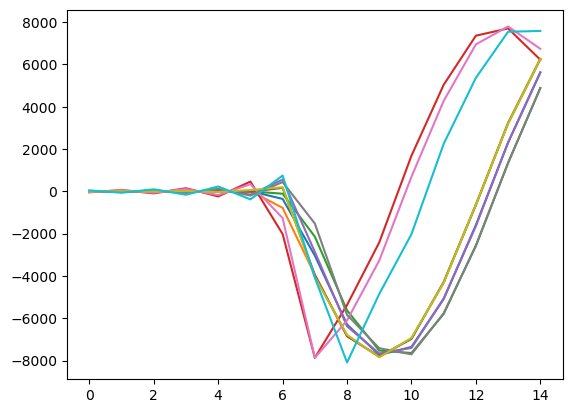

In [80]:
for i in range(10):
    plt.plot(I_array[i][75:90])


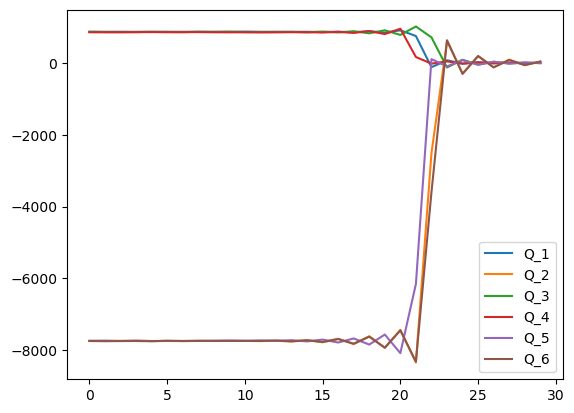

In [122]:
plt.plot(Q_1[60:90],label='Q_1')
plt.plot(Q_2[60:90],label='Q_2')
plt.plot(Q_3[60:90],label='Q_3')
plt.plot(Q_4[60:90],label='Q_4')
plt.plot(Q_5[60:90],label='Q_5')
plt.plot(Q_6[60:90],label='Q_6')
plt.legend()